In [1]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from mix_TimeSurface import *
from ToolsMonitor import DisplayImage
from Event import Event

# 1. Loading the events

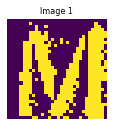

In [3]:
event0 = Event(ImageSize=(32, 32), ListPolarities=[-1, 1])

event0.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=15)

DisplayImage([event0])

# 2. Creating the SpatioTemporal Surface

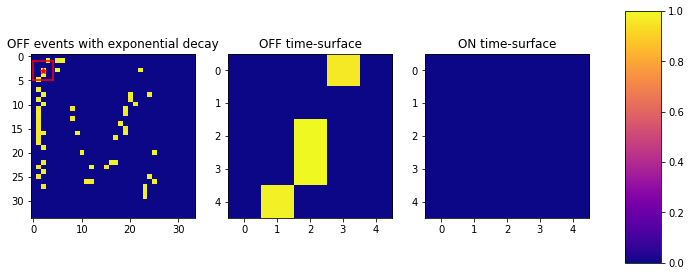

KeyboardInterrupt: 

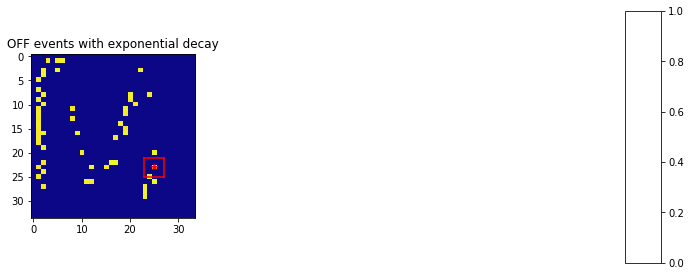

In [19]:
target_event = 20000
SpTe = TimeSurface(R=2,tau=0.02,camsize=[34,34])
i = 0
while i<target_event+1:
    TS, activ = SpTe.addevent(event0.address[i,1],event0.address[i,0],event0.time[i], event0.polarity[i])
    i+=1
    
SpTe.plote()

SpTe.plot3D()

### Testing a bigger $\tau$

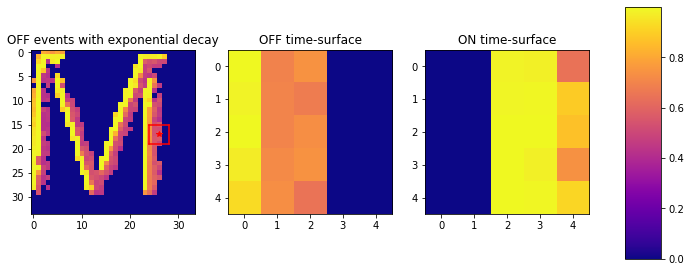

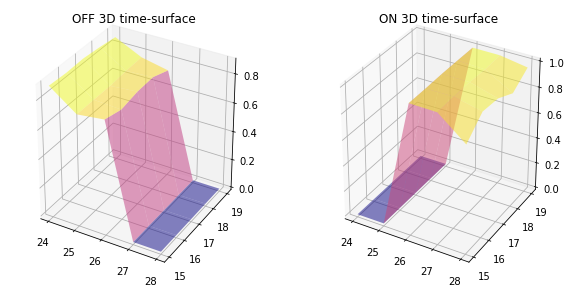

In [17]:
target_event = 20000
SpTe2 = TimeSurface(R=2,tau=0.2,camsize=[34,34])
i = 0
while i<target_event+1:
    TS, activ = SpTe2.addevent(event0.address[i,1],event0.address[i,0],event0.time[i], event0.polarity[i])
    i+=1
    
SpTe2.plote()

SpTe2.plot3D()